# Семинар 6


In [ ]:
!pip install -q scaleogram

In [ ]:
import math as m
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scaleogram as scg
from scipy.fftpack import fft
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [ ]:
def HankelMatrix(X, L):
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

## Исследуемый временной ряд

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/intsystems/MathematicalForecastingMethods/main/data/accident_UK.csv"

In [ ]:
data = pd.read_csv(DATA_PATH)

In [ ]:
print(data.head(20))

          Date  Total_Accident
0   01/01/2014             267
1   02/01/2014             328
2   03/01/2014             308
3   04/01/2014             272
4   05/01/2014             269
5   06/01/2014             359
6   07/01/2014             395
7   08/01/2014             413
8   09/01/2014             388
9   10/01/2014             473
10  11/01/2014             431
11  12/01/2014             242
12  13/01/2014             510
13  14/01/2014             567
14  15/01/2014             423
15  16/01/2014             442
16  17/01/2014             454
17  18/01/2014             298
18  19/01/2014             244
19  20/01/2014             493


In [ ]:
ts = data['Total_Accident'].values[:350]
ts = ts-ts.mean()

In [ ]:
fig = go.Figure()
fig.add_scatter(y = ts-ts.mean(), name = 'init time')
fig.show()

___
# Автокорреляционные функции

In [ ]:
acf_x = acf(ts, nlags = len(ts),alpha=0.5)

In [ ]:
fig = go.Figure()
fig.add_scatter(x = np.arange(len(acf_x[0])), y = acf_x[0], mode='lines', name='ACF')
fig.show()

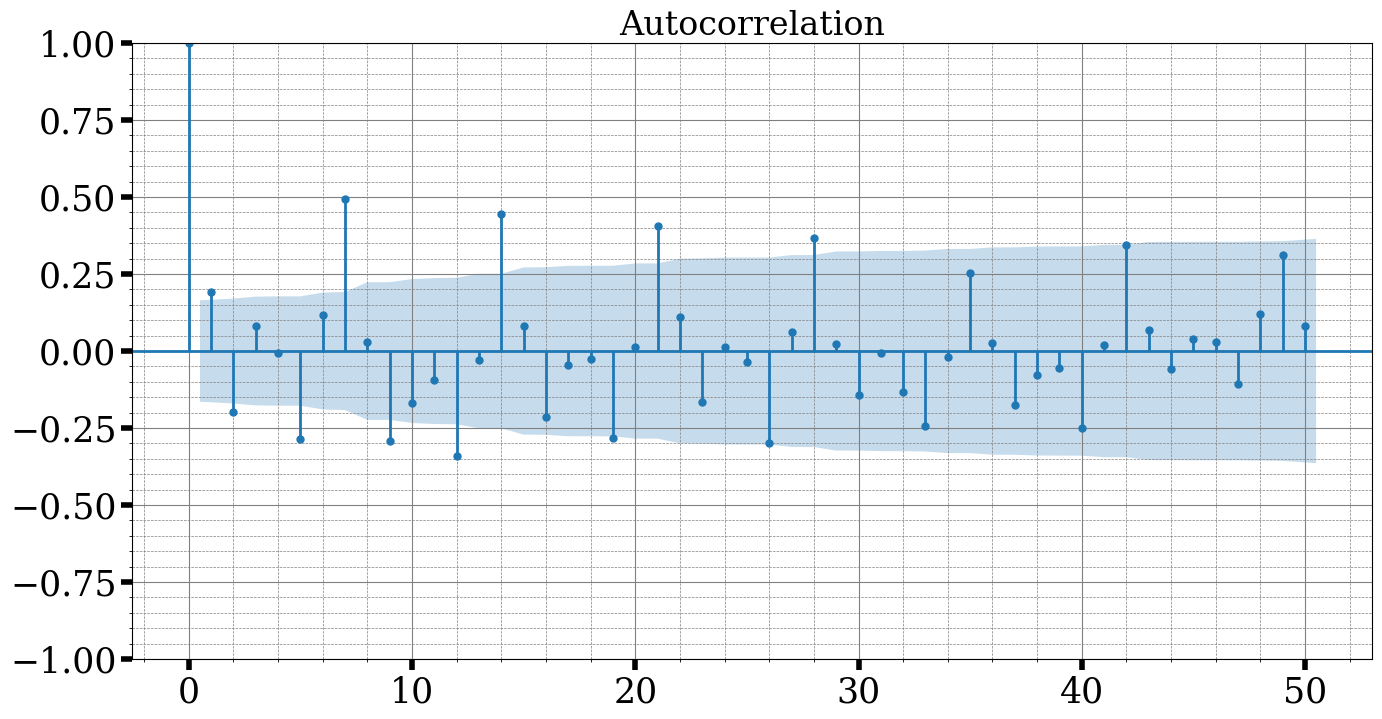

In [ ]:
ax = plot_acf(
    ts[:100],
    lags=50,
    use_vlines = True,
    alpha=0.1
)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=25,
    length=8,
    width=4
)
plt.grid(
    which='major',
    color = 'gray',
    linewidth = 0.8
)
plt.minorticks_on()
plt.grid(
    which='minor',
    color = 'gray',
    linestyle = '--',
    linewidth = 0.5
)
plt.show()

# Fast Fourier transforms

In [ ]:
num_to_print = 500

Fs = 1

N = len(ts)

__FS = np.linspace(0.0, 1.0/2.0 * Fs, N//2)

__Abs = 2.0/N * np.abs(fft(ts)[0:N//2]) #нормирование

# plotting the spectrum
fig = go.Figure()
fig.add_scatter(
    x = __FS[0:num_to_print],
    y = __Abs[0:num_to_print],
    mode='lines',
    name='Magnitude'
)

temp_fft = fft(ts)[0:N//2]

__Ph = np.arctan2(np.imag(temp_fft),np.real(temp_fft))

fig.add_scatter(
    x = __FS[0:num_to_print],
    y = __Ph[0:num_to_print],
    mode='markers',
    name='Phase'
)

fig.add_trace(
    go.Bar(
        x= __FS[0:num_to_print],
        y= __Ph[0:num_to_print],
        name='Phase'
    )
)

fig['layout']['yaxis1'].update(title='Magnitude')
fig['layout']['xaxis1'].update(title='Frec [1/day]')
fig.show()

In [ ]:
pd_Abs = pd.DataFrame(__Abs).sort_values(0, ascending=False)

In [ ]:
n_fig = 100
fig = go.Figure()

fig.add_scatter(
    x = np.arange(n_fig),
    y = ts[:n_fig],
    mode = 'lines',
    name = 'Real')

t = np.arange(n_fig)

for i, ind in enumerate(pd_Abs.index.values[:5]):
  x = __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])

  fig.add_scatter(
      x = t[:n_fig],
      y = x,
      mode='lines',
      name=f'{i} frec'
  )

for i, ind in enumerate(pd_Abs.index.values[:10]):
  if i == 0:
    x = __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])
  else:
    x+= __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])

fig.add_scatter(
    x = t[:n_fig],
    y = x,
    mode='lines',
    name='0-4 frec'
)

fig.show()

## Дополнительно изучить изменение характерых частот с помощью Вейвлет преобразований

* Один из основных первоисточников: https://www.hpl.hp.com/hpjournal/94dec/dec94a6a.pdf

* Теория RU: http://www.autex.spb.su/download/wavelet/books/tutorial.pdf

* Полезные примеры использования: https://habr.com/ru/post/454240/

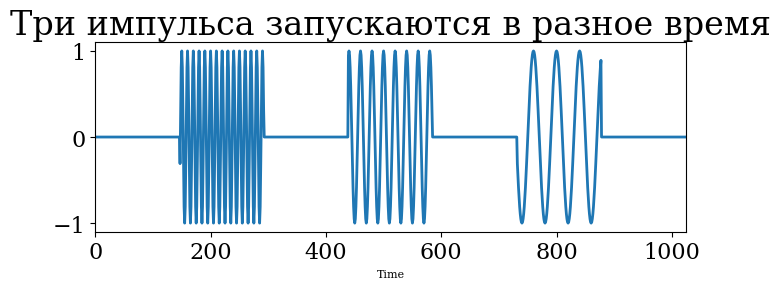

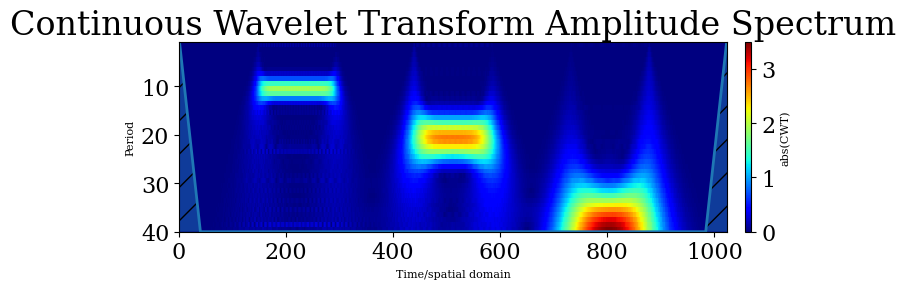

In [ ]:
from  numpy import*
import pandas as pd
from pylab import*
import scaleogram as scg

ns   = 1024
time = arange(ns)
scales = scg.periods2scales(arange(1, 40))
pulses = zeros(ns, dtype=float32)
steps  = linspace(0, ns, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (time > steps[i*2+1]) & (time < steps[i*2+2])
    pulses += cos(2*pi/periods[i]*time) * step_mask

fig1, ax1 = subplots(1, 1, figsize=(7,3));
lines = ax1.plot(pulses); ax1.set_xlim(0, len(time));
ax1.set_title("Три импульса запускаются в разное время"); ax1.set_xlabel("Time")
fig1.tight_layout()

coikw = {'alpha': 0.5, 'hatch': '/'}
ax2 = scg.cws(pulses, scales = scales, figsize = (7, 3), coikw=coikw)

tight_layout()
show()

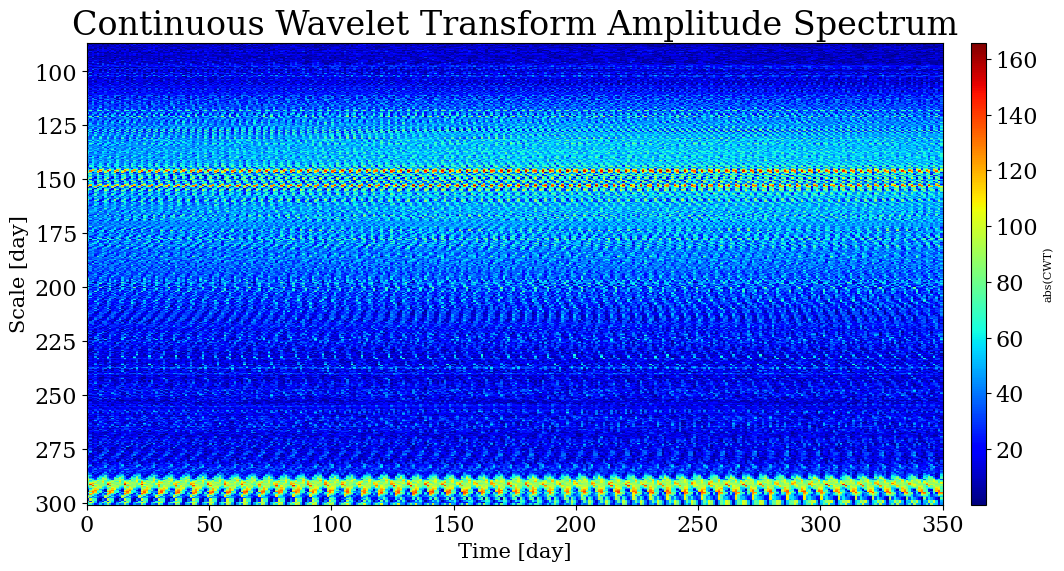

In [ ]:
scales = np.linspace(130,450,500)
ax = scg.cws(
    np.arange(len(ts)), ts,
     figsize = (12,6),
     scales = scales,
     wavelet = 'cmor6-1.5',
     coi=False
            )
ax.set_ylabel('Scale [day]',fontsize = 15)
ax.set_xlabel('Time [day]',fontsize = 15)
plt.show()

___
# Application of SSA

In [ ]:
class SSA(object):

    __supported_types = (pd.Series, np.ndarray, list)

    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.

        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list.
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.

        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """

        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")

        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")

        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1

        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T

        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)

        self.TS_comps = np.zeros((self.N, self.d))

        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."

            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."

        # Calculate the w-correlation matrix.
        self.calc_wcorr()

    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d

        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)


    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.

        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]

        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)

    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """

        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])

        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)

        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5

        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]

    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d

        if self.Wcorr is None:
            self.calc_wcorr()

        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)

        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max

        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)


In [ ]:
ts_ssa = SSA(ts, 10)

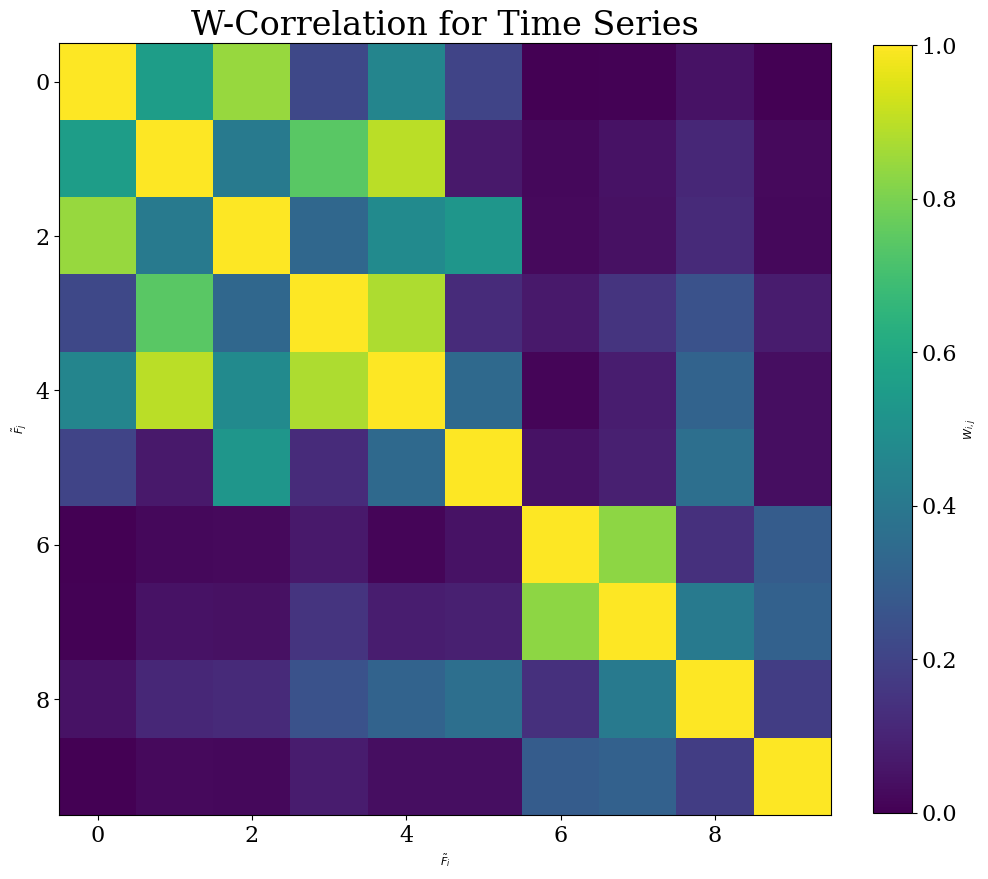

In [ ]:
plt.figure(figsize=(11, 11))
ts_ssa.plot_wcorr(max=10)
plt.title("W-Correlation for Time Series");

In [ ]:
n_fig = 100
fig = go.Figure()

fig.add_scatter(
    x = np.arange(n_fig),
    y = ts[:n_fig],
    mode='lines',
    name='Real')

for i in range(5):
  fig.add_scatter(
      x = np.arange(n_fig),
      y = ts_ssa.reconstruct(i)[:n_fig],
      mode='lines',
      name=f'{i} component SSA'
  )

fig.add_scatter(
      x = np.arange(n_fig),
      y = ts_ssa.reconstruct(slice(0,5))[:n_fig],
      mode='lines',
      name=f'0-5 components SSA'
  )

fig.show()

___
## Сравнение FFT и SSA

In [ ]:
n_fig = 100
fig = go.Figure()

fig.add_scatter(
    x = np.arange(n_fig),
    y = ts[:n_fig],
    mode='lines',
    name='Real')

fig.add_scatter(
    x = np.arange(n_fig),
    y = ts_ssa.reconstruct(slice(0,5))[:n_fig],
    mode='lines',
    name='SSA'
)


for i, ind in enumerate(pd_Abs.index.values[:10]):
  if i == 0:
    x = __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])
  else:
    x+= __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])

fig.add_scatter(
    x = t[:n_fig],
    y = x,
    mode='lines',
    name='FFT'
)

fig.show()

___